In [41]:
%load_ext autoreload
%autoreload 2

#Science and Data
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

# Infrastructure
from pathlib import Path
import sys
import os

#Plotting Tools
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
df = pd.read_csv("data.csv")
df["Txn_dt"] = pd.to_datetime(df["Txn_dt"], format="%d%m%Y")
df["Txn_time"] = pd.to_datetime(df["Txn_time"], format="%H%M%S").dt.time

In [43]:
df

,Cust_num,Txn_dt,Txn_time,Lat_long,Txn_ctry,Txn_amt,M_nm,M_cat,Channel
0,1234,2020-10-22,10:14:59,"-34.430263, 150.902505",Australia,$120,M1,Grocery,Face to face
1,1234,2020-10-23,20:14:50,"-34.427927, 150.899716",Australia,$100,M2,Restaurant,Face to face
2,3456,2020-10-22,09:10:23,NaN,Australia,$90,M3,Home improvement,Online
3,3456,2020-10-22,08:12:39,"-34.418696, 150.918340",Australia,$140,M4,Retail shopping,Face to face
4,6789,2020-10-22,13:10:23,"-34.421802, 150.909682",Australia,$67,M5,Fast food,Face to face
5,6789,2020-10-23,17:23:22,"-34.404507, 150.890005",Australia,$30,M6,Travel services,Face to face


In [44]:
df["Lat"] = np.nan
df["Lon"] = np.nan

In [45]:
lat = []
lon = []
for index, row in df.iterrows():
    try:
        lat.append(float(row["Lat_long"].split(",")[0]))
        lon.append(float(row["Lat_long"].split(",")[1]))
    except AttributeError:
        lat.append(np.nan)
        lon.append(np.nan)

In [46]:
df["Lat"] = lat
df["Lon"] = lon

In [47]:
geometry = [Point(xy) for xy in zip(df['Lon'], df['Lat'])]
gdf = GeoDataFrame(df, geometry=geometry)

In [48]:
gdf

,Cust_num,Txn_dt,Txn_time,Lat_long,Txn_ctry,Txn_amt,M_nm,M_cat,Channel,Lat,Lon,geometry
0,1234,2020-10-22,10:14:59,"-34.430263, 150.902505",Australia,$120,M1,Grocery,Face to face,-34.430263,150.902505,POINT (150.90250 -34.43026)
1,1234,2020-10-23,20:14:50,"-34.427927, 150.899716",Australia,$100,M2,Restaurant,Face to face,-34.427927,150.899716,POINT (150.89972 -34.42793)
2,3456,2020-10-22,09:10:23,NaN,Australia,$90,M3,Home improvement,Online,NaN,NaN,POINT (nan nan)
3,3456,2020-10-22,08:12:39,"-34.418696, 150.918340",Australia,$140,M4,Retail shopping,Face to face,-34.418696,150.918340,POINT (150.91834 -34.41870)
4,6789,2020-10-22,13:10:23,"-34.421802, 150.909682",Australia,$67,M5,Fast food,Face to face,-34.421802,150.909682,POINT (150.90968 -34.42180)
5,6789,2020-10-23,17:23:22,"-34.404507, 150.890005",Australia,$30,M6,Travel services,Face to face,-34.404507,150.890005,POINT (150.89001 -34.40451)


<AxesSubplot:xlabel='Lon', ylabel='Lat'>

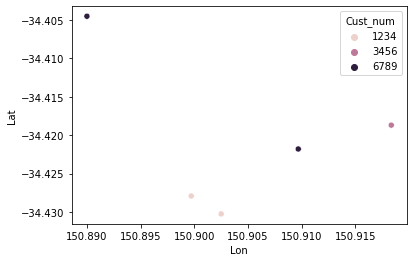

In [49]:
sns.scatterplot(x="Lon", y="Lat", hue="Cust_num", data=df)

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
<ipython-input-74-3576d232ff48>:6: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
/opt/conda/lib/python3.8/site-packages/contextily/tile.py:265: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  warnings.warn(


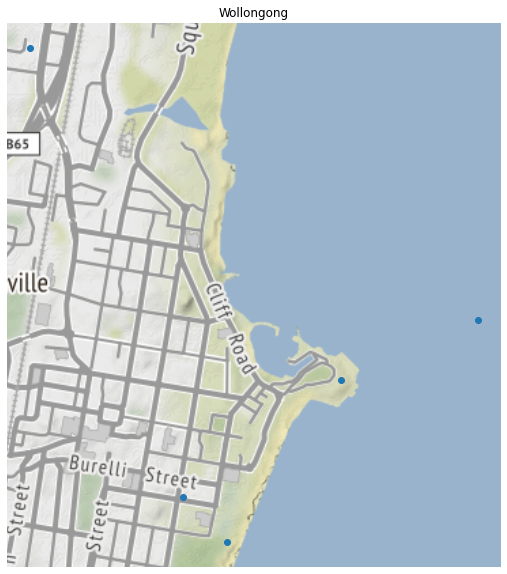

In [74]:
# src: https://stackoverflow.com/questions/54088858/plotting-a-map-using-geopandas-and-matplotlib
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd

# Let's define our raw data, whose epsg is 4326
temp = pd.DataFrame({
    'LAT'  :df["Lat"].to_list(),
    'LONG' :df["Lon"].to_list(),
})
temp['coords'] = list(zip(temp.LONG, temp.LAT))


# ... turn them into geodataframe, and convert our
# epsg into 3857, since web map tiles are typically
# provided as such.
geo_df = gpd.GeoDataFrame(
    temp, crs  ={'init': 'epsg:4326'},
    geometry = temp['coords'].apply(Point)
).to_crs(epsg=3857)

# ... and make the plot
ax = geo_df.plot(
    figsize= (20, 10),
    alpha  = 1
)
add_basemap(ax, zoom=14)
ax.set_axis_off()
plt.title('Wollongong')
plt.show()